In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
data = pd.read_csv("/content/drive/My Drive/CS439 DS project/collisions_data.csv")

In [4]:
# sneak peek at data
data

,Unnamed: 0,CRASH DATE,BOROUGH,LATITUDE,LONGITUDE,CRASH FACTOR,VEHICLE TYPE,VEHICLES INVOLVED,DEGREE OF EMERGENCY,CRASH HOUR
0,0,09/11/2021,NaN,NaN,NaN,aggressive driving/road rage,sedan,2,1,2
1,1,03/26/2022,NaN,NaN,NaN,pavement slippery,sedan,1,1,11
2,2,11/01/2023,BROOKLYN,40.621790,-73.970024,unspecified,moped,3,1,1
3,3,06/29/2022,NaN,NaN,NaN,following too closely,sedan,2,0,6
4,4,09/21/2022,NaN,NaN,NaN,passing too closely,st wagon/suv,1,0,13
...,...,...,...,...,...,...,...,...,...,...
2219652,2219652,11/08/2025,MANHATTAN,40.789623,-73.940060,passing or lane usage improper,sedan,2,0,22
2219653,2219653,11/08/2025,BROOKLYN,40.690567,-73.945350,traffic control disregarded,st wagon/suv,2,0,0
2219654,2219654,11/07/2025,BRONX,40.824707,-73.915510,unspecified,sedan,2,0,23
2219655,2219655,11/08/2025,BRONX,40.839880,-73.916790,unspecified,st wagon/suv,1,1,19


---
##<font color='green'> **Milestone - Time Series Analysis**</font>

In Time series analysis, we will visualize crucial components, which includes:

* What hours of the day are more prone to crash/collisions

* What is the trend of crashes/collisions throughout years

* Interpreting the results

---
####<font color='red'> More prone Crash Hours </font>

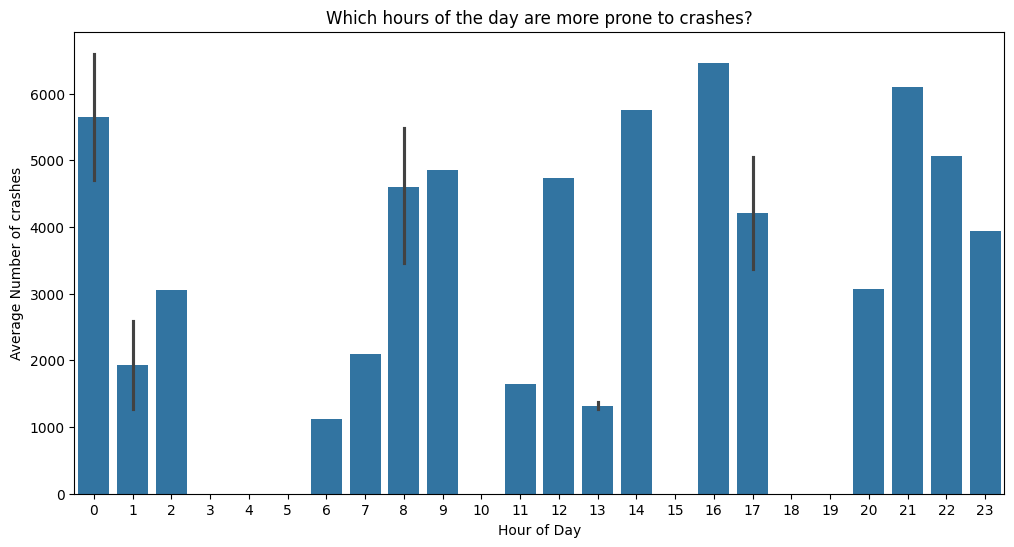

In [5]:
average_crashes_per_hour = data.groupby('CRASH HOUR').size() / data['CRASH HOUR'].nunique()

# Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x=data['CRASH HOUR'], y=average_crashes_per_hour)
plt.title('Which hours of the day are more prone to crashes?')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of crashes')
plt.xticks(range(0, 24))
plt.show()

####<font color='red'> Interpretation: </font>

> * The following hours are the ***safest***:
>
>> * Dusk hours from **3 am to 5 am**
>>
>> * hours after morning rush hour: **10 am**
>>
>> * hours after evening rush hour from **6 pm to 7 pm**
>>
>> * This makes sense provided that the rush hours has been passed; Therefore, less cars will be on roads, and more people take **MTA trains in NYC to commute** during this period of time.
>
> * The following hours are the ***most unsafe hours***:
>
>> * Morning rush hours from **8 am to 9 am**
>>
>> * Evening rush hours from **4 pm to 5 pm**. This happens probably because of **fatigued drivers leaving from works, high volume traffic congestion, and dusk visibility challenges after daylight savings turns off**.
>>
>> * Late night hours from **9 pm to midnight**. This happens probably because of **sleep deprivation, speeding because of empty roads, and intoxication**.

---
####<font color='red'> Trend of crashes throughout years </font>

We will be using seasonal_decompose to understand the data, which will give out the following components:
* **Trend**: long term movement of crashes data over time
* **Seasonal**: A repeating pattern or cycle that occurs at fixed, regular intervals
* **Residuals**: The unexplained variation or random noise in the data

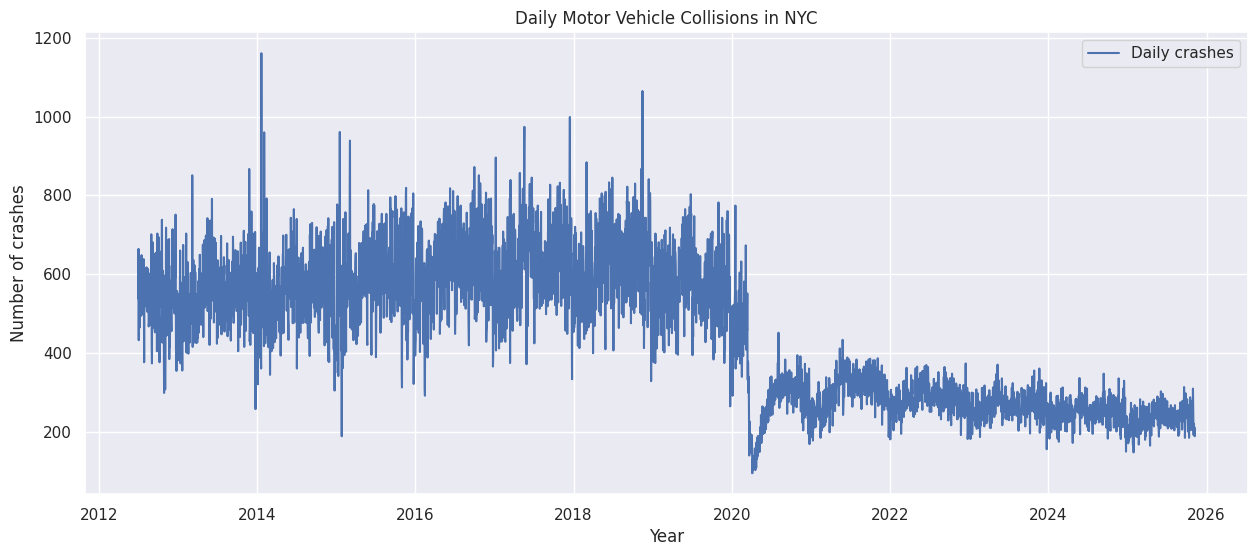

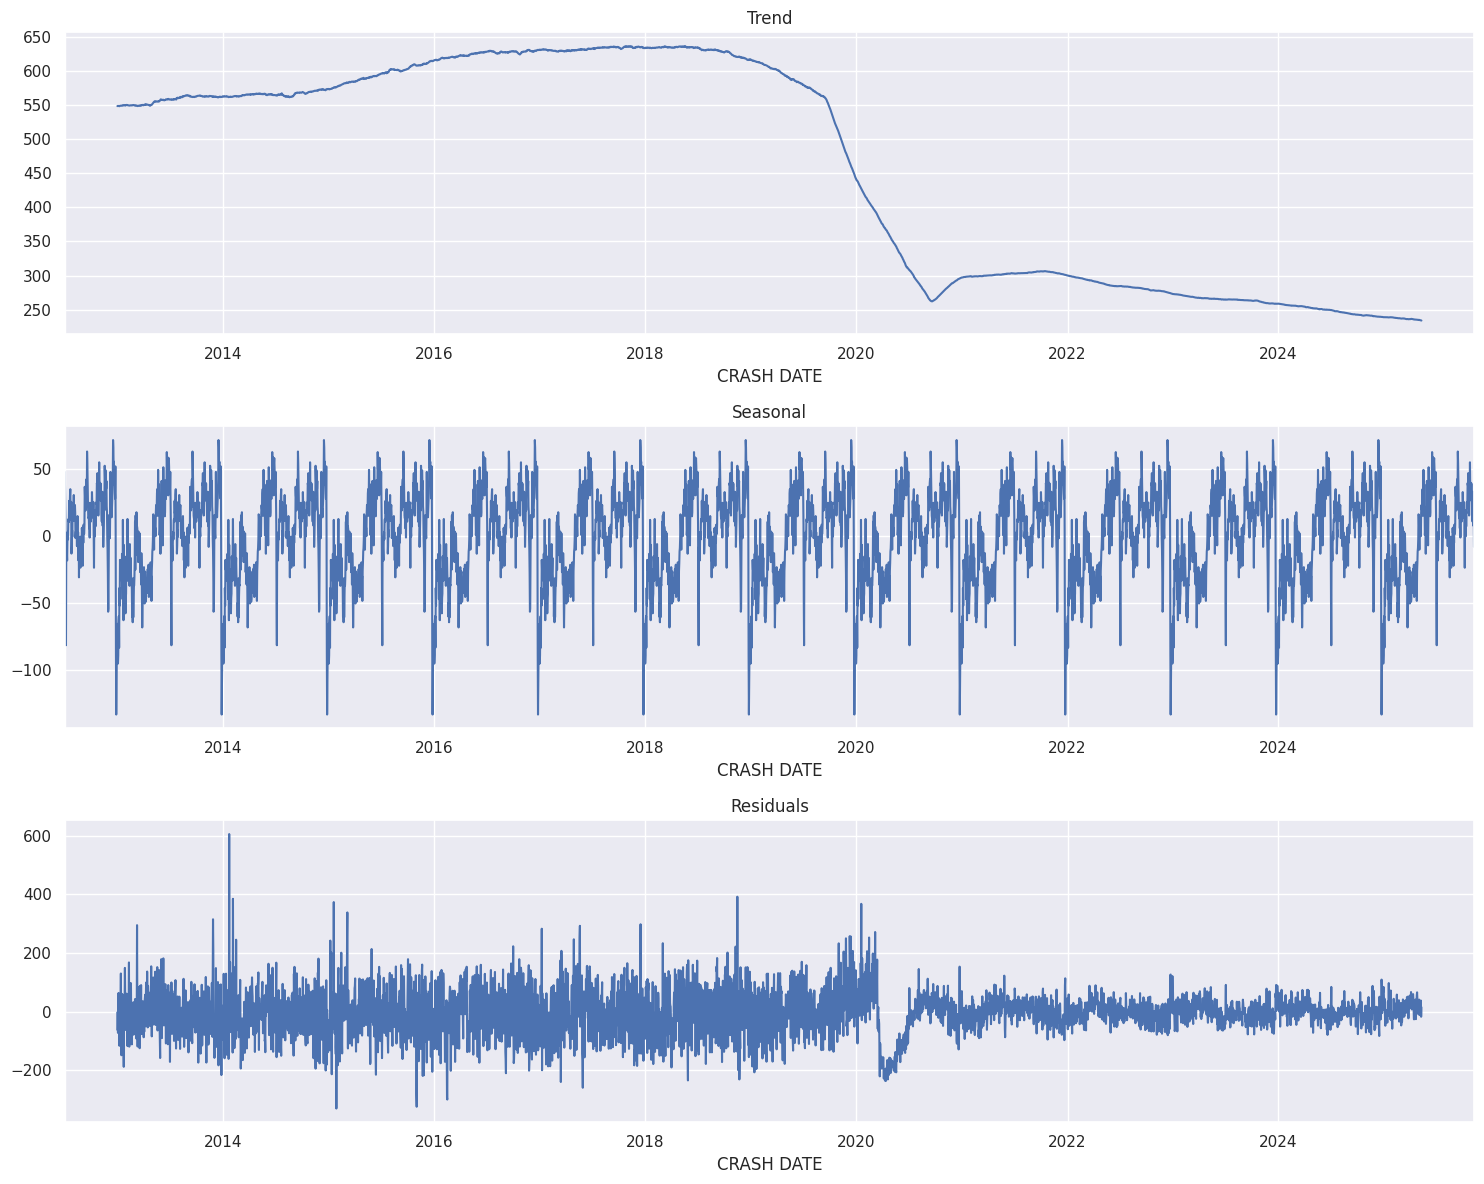

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Count the number of crashes per day, group by CRASH DATE
daily_crashes = data.groupby(data['CRASH DATE']).size()

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes, label='Daily crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('Year')
plt.ylabel('Number of crashes')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonal')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

####<font color='red'> Interpretation: </font>

* **Trend** shows:
> * crashes **increased from 2013 through 2019**, possibly due to increasing traffic on roads.
> * there is a **huge dip in number of crashes in late 2019 and 2020**. This happened due to COVID-19. **Lockdowns, business closures, and stay-at-home orders** drastically reduced the number of cars on the road.
> * Although, there happened **increase in number of crashes after COVID-19**, the low crash trend still continued. This was probably because of adoption of **hybrid work setups, high gas prices because of inflation, better road infrastructure** (because COVID-19 gave enough time to better the infrastructure of roads), and **improved automobile technology** (such as detection sensors, auto braking system, etc.).

* **Residual** graph shows:
> * **unpredicted fluctuation 1-2 months** into the year 2020
> * this is because of **COVID-19**, **leading to issuance of lockdown, office closure, stay-at-home orders caused the eradication of traffic from roads**, which subsequently resulted in less number of crashes.

---
---
##<font color='green'> **Milestone - Geospatial Analysis**</font>

In Geospatial analysis, we will:

* visualize geographical aspect of data

* how things relate geographically

* we will use latitudes and longitudes

/tmp/ipython-input-3570703375.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count, palette="viridis")


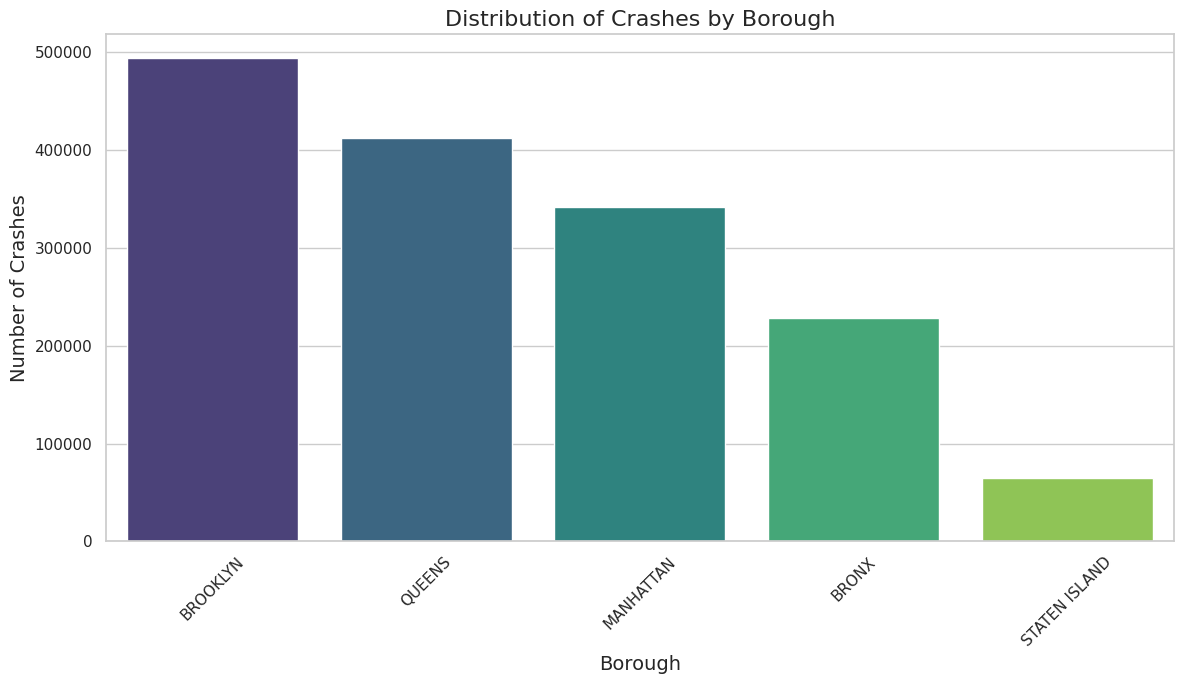

In [7]:
# Set style
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))
borough_count = data['BOROUGH'].value_counts()
sns.barplot(x=borough_count.index, y=borough_count, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####<font color='red'> Interpretation: </font>

* **Brooklyn has the most crashes**, followed by Queens, Manhattan, Bronx, and Staten Island at last.

* Upon checking the population of New York boroughs, the trend **seems to be following the population trend**. Brooklyn has the highest population, followed by Queens, Manhattan, and Bronx, and Staten Island has the least population. Therefore, Brooklyn has the most number of crashes, and Staten Island has the least.

* **Transportation and commute patterns** can also be the another probable cause behind this.

In [8]:
#Creating a heatmap using the latitude and longitude variables
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

m.save("Heatmap.html")

####<font color='red'> Interpretation: </font>

* **Manhattan has the highest density of crashes**. This is because Manhattan is the smallest borough of NYC, but the third most crash prone area.

* **Rockaway Beach area in Queens** also has high density of crashes.

* **Southmost point of Staten Island** is highly dense area with crashes in Staten Island. Staten Island has a lot of high density of crashes areas.

* **Rosedale in Queens** is another high crash area.

* **Bronx** is also home to high crash zones, maybe because of heavy traffic areas (**George Washington Bridge, I-278, I-295, I-95**).

* Apart from this, **Brooklyn and Queens has sparsely distributed areas of high crash zones**.

####<font color='red'> Relevance: </font>

* This is important because this will let us find **areas with high crash zones**.

* This heatmap will also help us **target specific zip codes** where we need to focus on **bringing NYC Vision Zero initiatives**.

* This heatmap will further help us decide how to **distribute traffic efficiently** in rush hours or in case of contruction to avoid maximum crashes.

* This will also help in **deciding where to invest in infrastructure** to reduce crashes.